Classifying 5 different animals using tensorflow:


*   Butterfly

*   Cat

*   Chicken
*   Dog


*   Spider

Link to access Dataset: https://www.kaggle.com/alessiocorrado99/animals10

In [1]:
#I hate warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import random as rn
import tensorflow as tf
import os

#Preprocessing
import cv2
from tqdm import tqdm_notebook as tqdm

#Additional imports for functionality
from sklearn.utils import class_weight, shuffle
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold

#For Graphing and Plotting Images
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

#Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D 

In [2]:
#acquiring folders that contains the 5 animal classes using
folders= os.listdir('/content/drive/MyDrive/Animals')

#Creating Empty lists for categories and the files
categories = []
files = []

#Going over all the folders and their categories in the foldernames
for k, folder in enumerate(folders):
    #Getting the filenames
    filename = os.listdir("/content/drive/MyDrive/Animals/" + folder);
    for file in filename:
        #Appending all the image files into one list
        files.append("/content/drive/MyDrive/Animals/" + folder + "/" + file)
        #Appending categories into one list
        categories.append(k)

df = pd.DataFrame({
    'filename': files,      #File Name
    'category': categories  #Label Number
})


In [3]:
df.head()
df = df.reset_index(drop=True)
df

,filename,category
0,/content/drive/MyDrive/Animals/Butterfly/OIP-t...,0
1,/content/drive/MyDrive/Animals/Butterfly/OIP-W...,0
2,/content/drive/MyDrive/Animals/Butterfly/OIP-f...,0
3,/content/drive/MyDrive/Animals/Butterfly/OIP-t...,0
4,/content/drive/MyDrive/Animals/Butterfly/OIP-i...,0
...,...,...
16557,/content/drive/MyDrive/Animals/Chicken/1110.jpeg,4
16558,/content/drive/MyDrive/Animals/Chicken/135.jpeg,4
16559,/content/drive/MyDrive/Animals/Chicken/109.jpeg,4
16560,/content/drive/MyDrive/Animals/Chicken/1159.jpeg,4


After extracting all the data and assigning a label to each data/image 

---

corresponding to a particular animal, we randomly select X amount of animals to train the data

In [4]:
new_df = pd.DataFrame(columns=['filename', 'category'])
for i in range(5):
    #randomly selecting 1000 images out of all the files available
    new_df = new_df.append(df[df.category == i].sample(n = 1500))

In [5]:
print(new_df.shape)
new_df.head()
new_df = new_df.reset_index(drop=True)
new_df

(7500, 2)


,filename,category
0,/content/drive/MyDrive/Animals/Butterfly/eb32b...,0
1,/content/drive/MyDrive/Animals/Butterfly/OIP-Q...,0
2,/content/drive/MyDrive/Animals/Butterfly/OIP-y...,0
3,/content/drive/MyDrive/Animals/Butterfly/OIP-6...,0
4,/content/drive/MyDrive/Animals/Butterfly/OIP-r...,0
...,...,...
7495,/content/drive/MyDrive/Animals/Chicken/OIP-R3e...,4
7496,/content/drive/MyDrive/Animals/Chicken/790.jpeg,4
7497,/content/drive/MyDrive/Animals/Chicken/OIP-Yd1...,4
7498,/content/drive/MyDrive/Animals/Chicken/OIP-P86...,4


We have gathered 1,500 images for each class creating a dataframe with a total of 7,500 images.

However, the images needs to be resized down into a 128x128 pixel image in order to train the model. THere is no guarantee that the images are all the same size, so we must assume this and alter it to our preferences.

Step 1) Collect the Animal Names and associate its name to its value

Step 2) Shuffle the dataset

Step 3) Separate the Labels and Files for training and testing

Step 4) Resize the Files

In [6]:
animal_name = []
labeling = []

for folder in enumerate(folders):
  animal_name.append(folder[1])
  labeling.append(folder)

#getting the Label Names of animals to use for predictions
print(animal_name)
#showing associated Numerical values with said animal class
print(labeling)

['Butterfly', 'Cat', 'Dog', 'Spider', 'Chicken']
[(0, 'Butterfly'), (1, 'Cat'), (2, 'Dog'), (3, 'Spider'), (4, 'Chicken')]


Name-Value Association

Butterfly - 0

Cat - 1

Dog - 2

Spider - 3

Chicken - 4

In [7]:
new_df = shuffle(new_df, random_state= rn.randint(1, 69))

print(new_df.shape)
new_df.head()
new_df = new_df.reset_index(drop=True)
new_df

(7500, 2)


,filename,category
0,/content/drive/MyDrive/Animals/Dog/OIP-O1I2JKn...,2
1,/content/drive/MyDrive/Animals/Butterfly/OIP-_...,0
2,/content/drive/MyDrive/Animals/Butterfly/ea31b...,0
3,/content/drive/MyDrive/Animals/Butterfly/OIP-2...,0
4,/content/drive/MyDrive/Animals/Spider/ed30b80e...,3
...,...,...
7495,/content/drive/MyDrive/Animals/Dog/OIP-ScZPL7E...,2
7496,/content/drive/MyDrive/Animals/Spider/OIP-9R4o...,3
7497,/content/drive/MyDrive/Animals/Cat/ea36b20f20f...,1
7498,/content/drive/MyDrive/Animals/Spider/OIP-lY8p...,3


Now that we shuffles the images, we separate the indexes filename and categories. So, we now can resize x_df files. The variable, isize, is adjustable for less hassle if we want to change the image size to train the model with.

In [8]:
#the x_df here isnt used as its to establish a df to insert the resized images

#x_df = new_df['filename'] #Images that needs to be resized
#y_df = new_df['category'] #Images' Labels

#print('X (Filename):', x_df.shape)
#print('Y (Categories):', y_df.shape)

In [9]:
print(new_df.category[0])

2


In [10]:
#establishing variable for image size to readjust if necessary
isize = 128

save_img = []
images = []
#tqdm is used for visualing the progress of the image preprocessing as a progress bar
with tqdm(total=len(new_df)) as pbar:
    #Going over all the filenames in train_df
    for i, file_path in enumerate(new_df.filename.values):
        #Read image using imread
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, dsize=(isize, isize))
        images.append([img, new_df.category[i]])
        save_img.append(img)
        pbar.update(1)

#return resized images back to x_df
x_df = np.array(images)

  0%|          | 0/7500 [00:00<?, ?it/s]

Applying One-Hot Enconding for Label Set (y_df) and normalize the Image Data in the Image Set (x_df) 

In [11]:
x = []
y = []
for pic, label in x_df:
    x.append(pic)
    y.append(label)


#Note Don't repeatedly run this cell or else ",5)" gets added to the y_df shape
x = np.array(x).reshape(-1, 128, 128, 3)
y = np.array(y)

print(x.shape)
print(y.shape)

#One-Hot Encoding
Y = to_categorical(y)

#Normalize the entries to intervals [0,1]
X = x.astype('float32')
X /= 255

print(X.shape)
print(Y.shape)

(7500, 128, 128, 3)
(7500,)
(7500, 128, 128, 3)
(7500, 5)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#Previewing the Class Images

Images are set to 128 x 128 size now

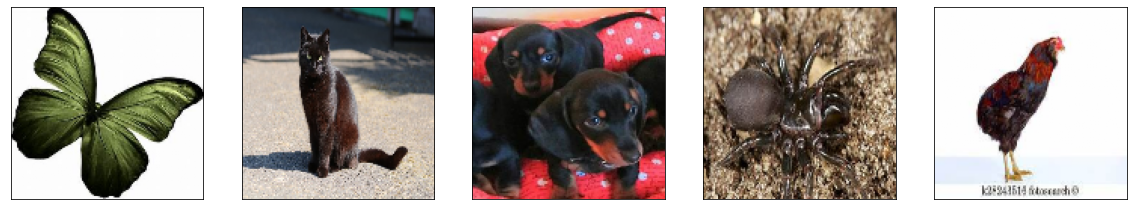

In [13]:
cols = 5
fig, axes = plt.subplots(ncols=cols, figsize=(20,20))

#Going over each category
for i in range(5):
    #Getting path for each category
    path = new_df[new_df.category == i].values[2]
    axes[i%cols].imshow(X[new_df[new_df.filename == path[0]].index[0]], cmap="gray")
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

#Model Design and Training

Starting simple with the model design before adding 

In [14]:
def vanilla_cnn():
  model = Sequential()
  model.add(Conv2D(filters = 32,kernel_size = (3, 3),padding="same", 
                   activation="relu", input_shape=(isize, isize, 3)))
  #model.add(Dropout(0.3))
  model.add(MaxPooling2D(3,3))
  
  #prev: filter 32
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), 
                   padding="same", activation="relu"))
  model.add(Dropout(0.3))

  model.add(MaxPooling2D(3,3))

  #Added another LAYER

  model.add(Conv2D(filters = 128, kernel_size = (3, 3), 
                   padding="same", activation="relu"))
  model.add(Dropout(0.3)) #was 0.4
  model.add(MaxPooling2D(3,3))
  
  #prev filter: 64
  model.add(Conv2D(filters = 256, kernel_size = (3, 3), 
                   padding="same", activation="relu"))
  model.add(MaxPooling2D(3,3))
  model.add(Dropout(0.3)) 


  model.add(Flatten())
  model.add(Dense(128,activation="relu"))  #prev val: 128
  #model.add(Dropout(0.5))  #added drop
  model.add(Dense(5, activation="softmax"))
  return model



Cutting down epoch amount from 20 to 15 as it begins to overfit between epoch 10 to 15

batch = 50 -> 100

epoch = 20 -> 15

Optimizer = SGD -> Adam

In [15]:
batch = 100
epochs = 15

#opt = Adam(learning_rate= .0001)
#opt = = SGD(learning_rate=0.008, decay = 0.0008, momentum = 0.85)

def compile_model(model, optimizer = 'Adam', loss = "categorical_crossentropy", metrics = ["accuracy"]): 
  model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
  return model

model = compile_model(vanilla_cnn())

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 42, 42, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       7

In [17]:
history = model.fit(X, Y, batch_size = batch, epochs = epochs, 
                    validation_split = 0.2, verbose = 1)

Epoch 1/15
60/60 [==============================] - 115s 2s/step - loss: 1.4638 - accuracy: 0.3403 - val_loss: 1.3909 - val_accuracy: 0.4220
Epoch 2/15
60/60 [==============================] - 113s 2s/step - loss: 1.2261 - accuracy: 0.4800 - val_loss: 1.2068 - val_accuracy: 0.5560
Epoch 3/15
60/60 [==============================] - 113s 2s/step - loss: 1.0491 - accuracy: 0.5750 - val_loss: 1.0248 - val_accuracy: 0.6120
Epoch 4/15
60/60 [==============================] - 113s 2s/step - loss: 0.9326 - accuracy: 0.6197 - val_loss: 0.9821 - val_accuracy: 0.6553
Epoch 5/15
60/60 [==============================] - 113s 2s/step - loss: 0.8183 - accuracy: 0.6763 - val_loss: 0.9635 - val_accuracy: 0.6347
Epoch 6/15
60/60 [==============================] - 113s 2s/step - loss: 0.7512 - accuracy: 0.7033 - val_loss: 0.8338 - val_accuracy: 0.7093
Epoch 7/15
60/60 [==============================] - 113s 2s/step - loss: 0.7044 - accuracy: 0.7202 - val_loss: 0.7862 - val_accuracy: 0.7153
Epoch 8/15
60

#Graphing Result's Loss and Accuracy

We can see validation loss and accuracy to stagnate from epoch 10/11 onwards. Will be adjusting the model to further improve results since I want to achieve at least 80% validation accuracy with miminal loss.

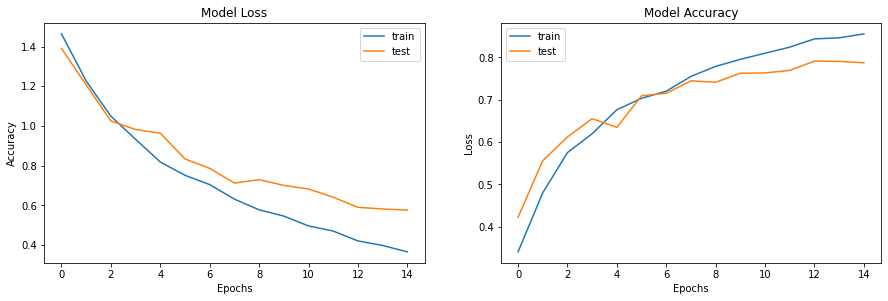

In [18]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
fig.set_size_inches(15, 15)
gs = gridspec.GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
plt.title('Model Loss')
ax1.set_ylabel('Loss')

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
ax2.set_ylabel('Accuracy')

ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epochs')
ax1.legend(['train', 'test'])

ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.legend(['train', 'test'])

plt.show()

Fix the code below cuz it keeps outputting butterfly as predicted result

In [19]:
print(np.array(images).shape)

(7500, 2)


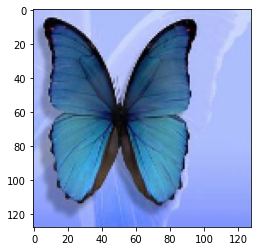

Actual  : Butterfly
Predict : Butterfly


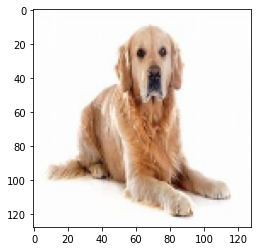

Actual  : Cat
Predict : Cat


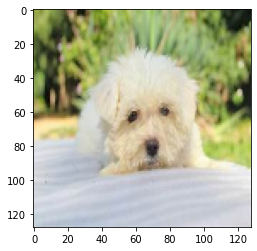

Actual  : Dog
Predict : Dog


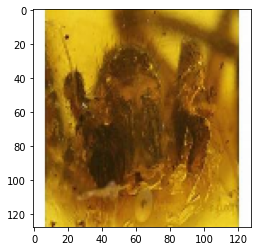

Actual  : Spider
Predict : Butterfly


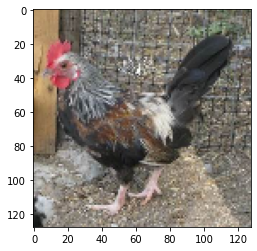

Actual  : Chicken
Predict : Butterfly


In [25]:
#Empty list to get images for testing
test_images = []
j = rn.randint(0,1412)

#Getting one image from each category for testing
for i in range(5):
    #Getting File Path
    path = new_df[new_df.category == i].values[j]
    #Getting Image from File
    a = save_img[new_df[new_df.filename == path[0]].index[0]]
    #Converting image into pixel array
    img = np.array(a)
    
    #Preprocessing images using opencv
    img = img[:, :, ::-1].copy() 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dsize=(isize, isize))
    
    #Reshaping into 224x224psx for VGG-16 model 
    test_images.append(img)

test_images = np.array(test_images).reshape(-1,128,128,3)

#Making predictions on test_images
predictions = model.predict(test_images)

#Plotting predictions
i = 0
for pred in predictions:
    path = new_df[new_df.category == i].values[2]
    plt.imshow(test_images[i])
    plt.show()
    print('Actual  :', animal_name[i])
    print('Predict :', animal_name[np.where(pred.max() == pred)[0][0]])
    i += 1